In [55]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import dataframe_image as dfi
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
# Print iterations progress
def printProgressBar (iteration, total, filename, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', filename, end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()
def print_dataframe(df, filename):
    with pd.option_context('display.max_columns', None, 'display.expand_frame_repr', False, 'display.max_rows', 5, 'display.width', None, 'display.max_colwidth', None):
        display(df)
        dfi.export(df, filename, max_rows=5, max_cols=5)

In [49]:
df = pd.read_csv('./UkraineTweets./0501_UkraineCombinedTweetsDeduped.csv')
print_dataframe(df, 'TweetDatasetTable.png')

Unnamed: 0              userid        username                                                                                                                                                                 acctdesc          location  following  followers  totaltweets               usercreatedts              tweetid              tweetcreatedts  retweetcount                                                                                                                                                                                                                                                                                                                  text                                                                                               hashtags language coordinates  favorite_count  is_retweet    original_tweet_id  original_tweet_userid original_tweet_username  in_reply_to_status_id  in_reply_to_user_id in_reply_to_screen_name  is_quote_status  quoted_status_id  quoted_status_userid quoted_status_username                 extractedts
0                0           529588633     PLinToronto  Consulate General of the Republic of Poland in Toronto. For photos and more visit our FB profile https://t.co/J7d8YnMP28\n\nConsul General Mrs. Magdalena Pszczółkowska  Toronto, Ontario        674       2977        10112  2012-03-19 18:10:36.000000  1520553587276795905  2022-05-01 00:00:00.000000             2  Remember this 👇 image next time you fix a meal for your family.\n\nEvery day, Russia sells 700M euro worth of oil and gas to the world. It's your tax money, too.\n\nWe🇵🇱 say there can't be business as usual when 🇺🇦 starve in their besieged cities!\n\n#StopRussianOil, #StopRussiaNow!🚫 https://t.co/O8TAlUf1rY  [{'text': 'StopRussianOil', 'indices': [245, 260]}, {'text': 'StopRussiaNow', 'indices': [262, 276]}]       en         NaN               5       False                    0                      0                     NaN                      0                    0                     NaN            False                 0                     0                    NaN  2022-05-01 09:12:42.918515
1                1  835922746416762880  arctic_fox_PTN                                             News of the war in Ukraine. Chronicle of Putin's Russia decadence. Новости войны в Украине. Хроника упадка путинской России.           Украина        368        158        62968  2017-02-26 18:41:28.000000  1520553587490926594  2022-05-01 00:00:00.000000            23                                                                   🇺🇦 Збройні Сили України продовжують повертати під контроль населені пункти на околицях Харкова\n\nУ результаті наступу підрозділів відновлено контроль над населеним пунктом Верхня Роганка\n\nДеталі: https://t.co/xNz2Uamq1N\n\n#Україна #Ukraine                                                                                                     []       uk         NaN               0        True  1520471236798828544             1102047326               mil_in_ua                      0                    0                     NaN            False                 0                     0                    NaN  2022-05-01 00:21:48.021996
...            ...                 ...             ...                                                                                                                                                                      ...               ...        ...        ...          ...                         ...                  ...                         ...           ...                                                                                                                                                                                                                                                                                                                   ...                                                                                                    ...      

In [43]:
df = pd.read_csv('./geolocation_final.csv')
print_dataframe(df, 'GeolocationTable.png')

city_name  city_latitude  city_longitude state_code         state_name  state_latitude  state_longitude country_code country_name  country_latitude  country_longitude
0                 Ashkāsham       36.68333        71.53333        BDS         Badakhshan       36.734772        70.811995           AF  Afghanistan              33.0               65.0
1                  Fayzabad       37.11664        70.58002        BDS         Badakhshan       36.734772        70.811995           AF  Afghanistan              33.0               65.0
...                     ...            ...             ...        ...                ...             ...              ...          ...          ...               ...                ...
148064    Shurugwi District      -19.75000        30.16667         MI  Midlands Province      -19.055201        29.603549           ZW     Zimbabwe             -20.0               30.0
148065  Zvishavane District      -20.30345        30.07514         MI  Midlands Province      -19.055201        29.603549           ZW     Zimbabwe             -20.0               30.0

[148066 rows x 11 columns]

In [87]:
# assign directory
directory = './preprocessed/'
 
# iterate over files in
# that directory
columns = 0
rows = 0
total = sum([len(files) for r, d, files in os.walk(directory)])
count = 0
tweet_counts = []
popularity_scores = []
reach_scores = []
sentiment_scores = []
for root, dirs, files in os.walk(directory):
    for filename in files:
        count += 1
        df = pd.read_csv(os.path.join(root, filename), converters={'popularity_score': int, 'reach_score':int}, encoding='UTF-8')
        tweet_counts.append(len(df.index))
        popularity_scores.append(df['popularity_score'].sum())
        reach_scores.append(df['reach_score'].sum())
        printProgressBar(count, total, filename=os.path.join(root, filename))
print('Columns (avg):', columns/total)
print('Total rows:', rows)
x = np.arange(0, 14)
print(tweet_counts)
print(popularity_scores)
print(reach_scores)
tick_label = ['2022 Mar', '2022 Apr', '2022 May', '2022 Jun', '2022 Jul', '2022 Aug', '2022 Sep', '2022 Oct', '2022 Nov', '2022 Dec', '2023 Jan', '2023 Feb', '2023 Mar', '2023 Apr']

C:\Users\Dukyoung\AppData\Local\Temp/ipykernel_7460/1190087333.py:17: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(root, filename), converters={'popularity_score': int, 'reach_score':int}, encoding='UTF-8')


C:\Users\Dukyoung\AppData\Local\Temp/ipykernel_7460/1190087333.py:17: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(root, filename), converters={'popularity_score': int, 'reach_score':int}, encoding='UTF-8')


C:\Users\Dukyoung\AppData\Local\Temp/ipykernel_7460/1190087333.py:17: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(root, filename), converters={'popularity_score': int, 'reach_score':int}, encoding='UTF-8')


C:\Users\Dukyoung\AppData\Local\Temp/ipykernel_7460/1190087333.py:17: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(root, filename), converters={'popularity_score': int, 'reach_score':int}, encoding='UTF-8')


C:\Users\Dukyoung\AppData\Local\Temp/ipykernel_7460/1190087333.py:17: DtypeWarning: Columns (9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(root, filename), converters={'popularity_score': int, 'reach_score':int}, encoding='UTF-8')


 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0%  ./preprocessed/UkraineTweetsPreprocessed_2023_04.csv
Columns (avg): 0.0
Total rows: 0
[3677324, 2896412, 2398209, 1598293, 1219914, 558195, 319996, 334132, 281634, 284873, 223345, 370342, 785197, 385610]
[3547918588, 2724744639, 1406446436, 1028934742, 448183589, 380775881, 4067953, 4269947, 3054283, 2662285, 2045763, 28164595, 185040968, 131083110]
[22241685809, 16644855674, 16142249423, 9213658503, 6635880365, 6704784774, 5780010009, 4795316472, 4513107482, 3846809693, 3037585126, 5135760545, 6288534862, 2890419401]


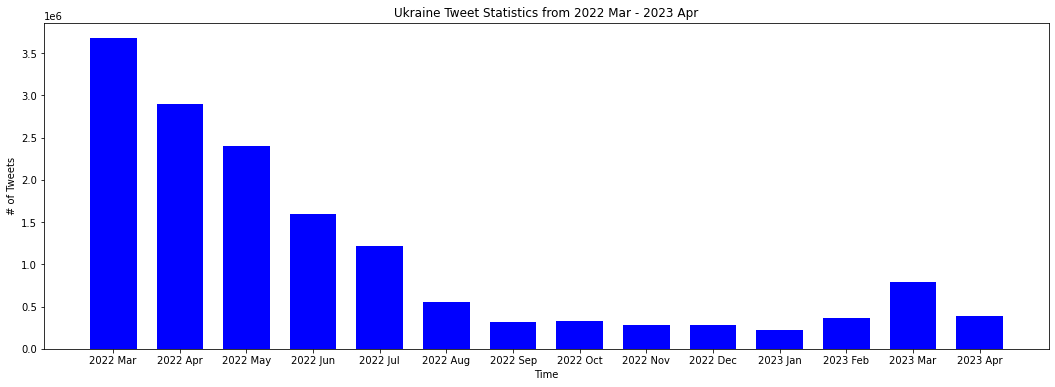

<Figure size 864x1728 with 0 Axes>

In [88]:
fig = plt.figure(figsize=(18, 6))
plt.bar(x, height=tweet_counts, tick_label = tick_label, width = 0.7, color = ['blue'])
# naming the x-axis
plt.xlabel('Time')
# naming the y-axis
plt.ylabel('# of Tweets')
# plot title
plt.title('Ukraine Tweet Statistics from 2022 Mar - 2023 Apr')
plt.figure(figsize=(12, 24))
plt.show()

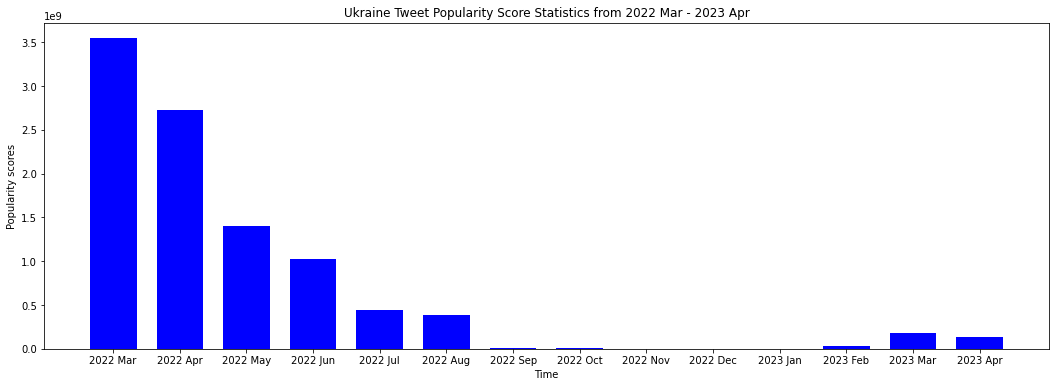

<Figure size 864x1728 with 0 Axes>

In [89]:
fig = plt.figure(figsize=(18, 6))
plt.bar(x, height=popularity_scores, tick_label = tick_label, width = 0.7, color = ['blue'])
plt.xlabel('Time')
plt.ylabel('Popularity scores')
plt.title('Ukraine Tweet Popularity Score Statistics from 2022 Mar - 2023 Apr')
plt.figure(figsize=(12, 24))
plt.show()

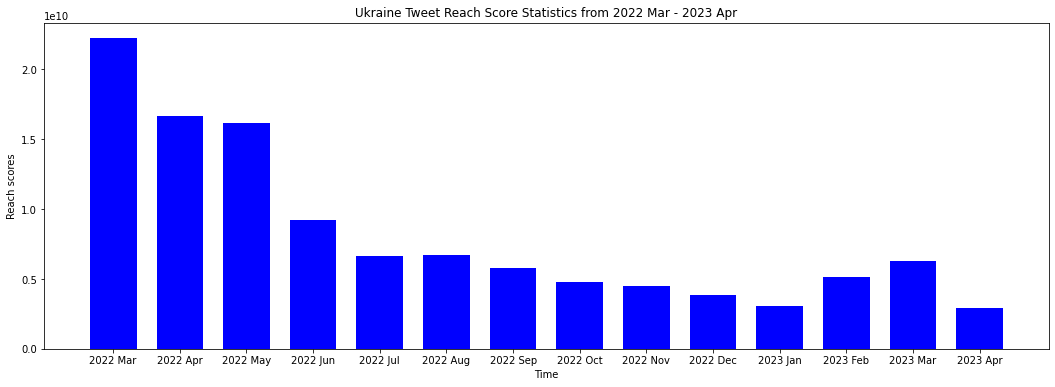

<Figure size 864x1728 with 0 Axes>

In [90]:
fig = plt.figure(figsize=(18, 6))
plt.bar(x, height=reach_scores, tick_label = tick_label, width = 0.7, color = ['blue'])
plt.xlabel('Time')
plt.ylabel('Reach scores')
plt.title('Ukraine Tweet Reach Score Statistics from 2022 Mar - 2023 Apr')
plt.figure(figsize=(12, 24))
plt.show()

14
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0%  ./merged_by_country_bert_processed_tweets/tweets_by_country_with_classification_2023_04.csv
{'Algeria': 8, 'Armenia': 4, 'Australia': 908, 'Austria': 16, 'Azerbaijan': 3, 'Bahamas The': 83, 'Bahrain': 6, 'Bangladesh': 298, 'Belgium': 58, 'Benin': 5, 'Bhutan': 1, 'Bolivia': 2, 'Bosnia and Herzegovina': 13, 'Botswana': 7, 'Brazil': 37, 'Bulgaria': 172, 'Cameroon': 8, 'Canada': 445, 'Cape Verde': 33, 'Chile': 21, 'China': 42, 'Colombia': 142, 'Congo': 1, 'Costa Rica': 5, 'Croatia': 9, 'Cuba': 11, 'Cyprus': 18, 'Czech Republic': 3, 'Denmark': 496, 'Dominican Republic': 5, 'Ecuador': 110, 'Egypt': 4, 'Estonia': 19, 'Ethiopia': 5, 'Finland': 53, 'France': 679, 'Georgia': 11, 'Germany': 345, 'Ghana': 76, 'Greece': 10, 'Guatemala': 1, 'Honduras': 4, 'Hungary': 18, 'India': 4245, 'Indonesia': 381, 'Iran': 79, 'Ireland': 263, 'Israel': 19, 'Italy': 1275, 'Jamaica': 33, 'Japan': 3279

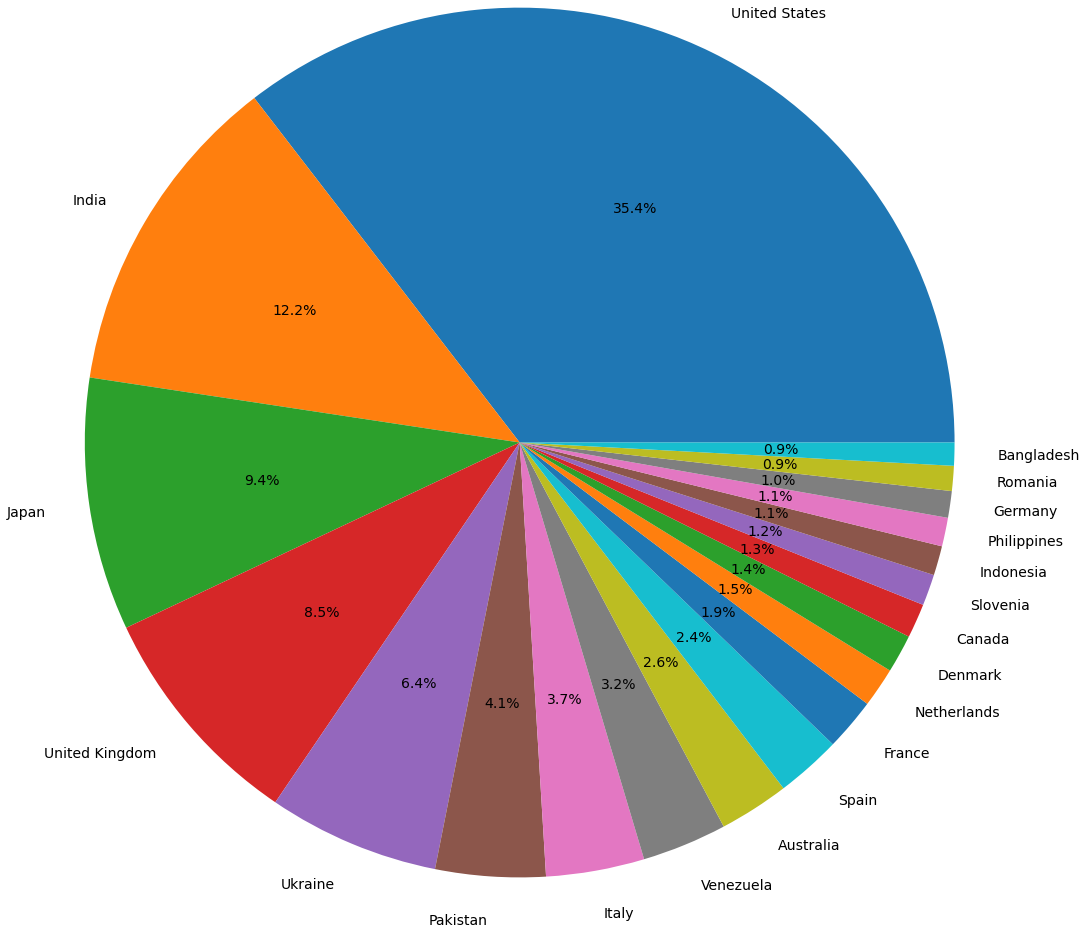

In [64]:
# assign directory
directory = './merged_by_country_bert_processed_tweets/'
 
# iterate over files in
# that directory
columns = 0
rows = 0
total = sum([len(files) for r, d, files in os.walk(directory)])
count = 0
print(total)
tweet_by_country = {}
sentiments_by_country = {}
for root, dirs, files in os.walk(directory):
    for filename in files:
        count += 1
        printProgressBar(count, total, filename=os.path.join(root, filename))
        df = pd.read_csv(os.path.join(root, filename), encoding='UTF-8')
        for index, tweet in df.iterrows():
            # location = tuple(0 if val.strip() == 'nan' else val.replace('\'','').strip() for val in tweet[0].strip('()').split(','))
            country = tweet[3]
            sentiment = tweet[-2]
            if country not in tweet_by_country:
                tweet_by_country[country] = 1
                sentiments_by_country[country] = {'POSITIVE':0, 'NEGATIVE':0}
                sentiments_by_country[country][sentiment] += 1
            else:
                tweet_by_country[country] += 1
                sentiments_by_country[country][sentiment] += 1
        # print(filename, sentiments_by_country['United States'])
sorted_tweet_by_country = dict(sorted(tweet_by_country.items(), key=lambda x:x[1], reverse=True))
countries = list(sorted_tweet_by_country.keys())[:20]
country_tweets = list(sorted_tweet_by_country.values())[:20]
fig, ax = plt.subplots()
ax.pie(country_tweets, labels=countries, autopct='%1.1f%%', radius=5, textprops={'fontsize': 14})

print(tweet_by_country)

C:\Users\Dukyoung\AppData\Local\Temp/ipykernel_7460/1058979647.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


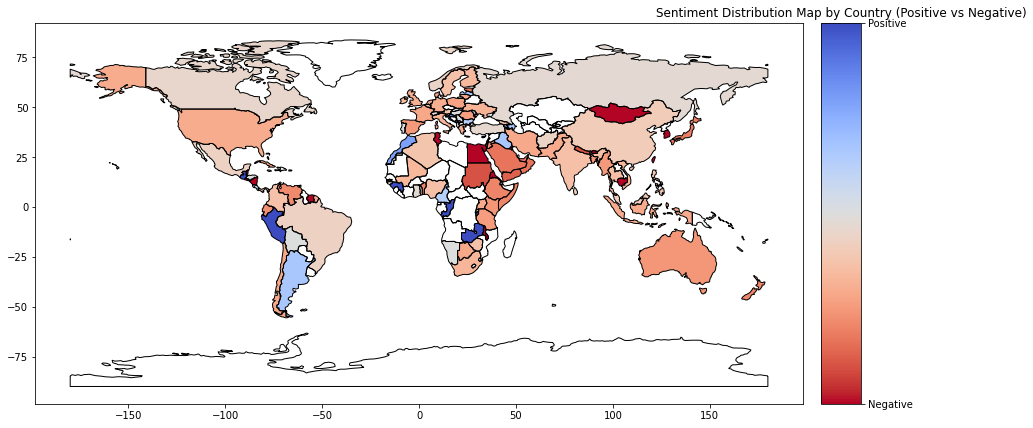

In [80]:
sentiment_map_dict = {'country':[], 'sentiment_sum':[]}
for country in sentiments_by_country.keys():
    if country == 'United States':
        sentiment_map_dict['country'].append('United States of America')
    else:
        sentiment_map_dict['country'].append(country)

    sentiment_map_dict['sentiment_sum'].append(int(sentiments_by_country[country]['POSITIVE']) / (int(sentiments_by_country[country]['NEGATIVE']) + int(sentiments_by_country[country]['POSITIVE'])))
# Fix the country name for United States
sentiment_df = pd.DataFrame(sentiment_map_dict)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the sentiment data with the world GeoDataFrame using the 'country' column
world_merged = world.merge(sentiment_df, left_on='name', right_on='country')

# Plot the sentiment distribution on the world map
fig, ax = plt.subplots(1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.boundary.plot(ax=ax, linewidth=1, color='black')
sm = plt.cm.ScalarMappable(cmap='coolwarm_r')
sm.set_array(world_merged['sentiment_sum'])

world_merged.plot(column='sentiment_sum', cmap='coolwarm_r', ax=ax)

# Customize the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.set_ticks([cbar.vmin, cbar.vmax])
cbar.set_ticklabels(['Negative', 'Positive'])

plt.title("Sentiment Distribution Map by Country (Positive vs Negative)")
plt.show()

C:\Users\Dukyoung\AppData\Local\Temp/ipykernel_7460/3466752686.py:25: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


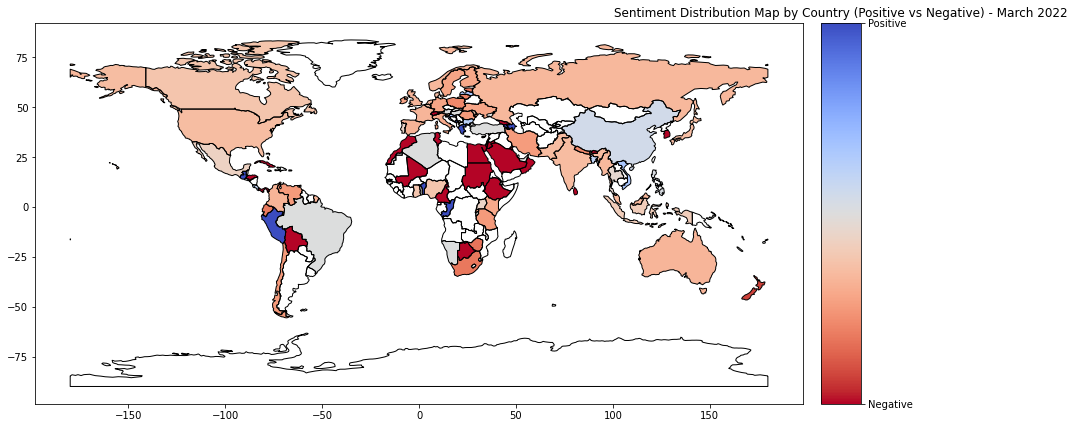

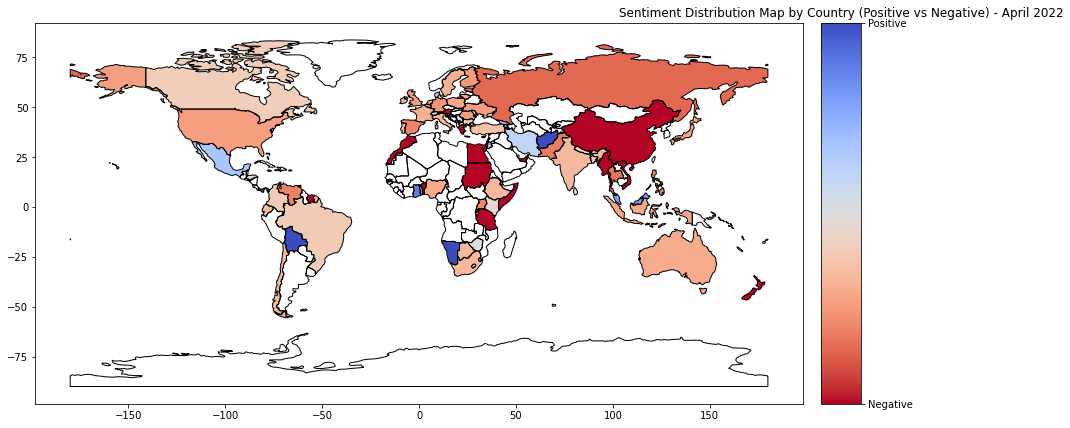

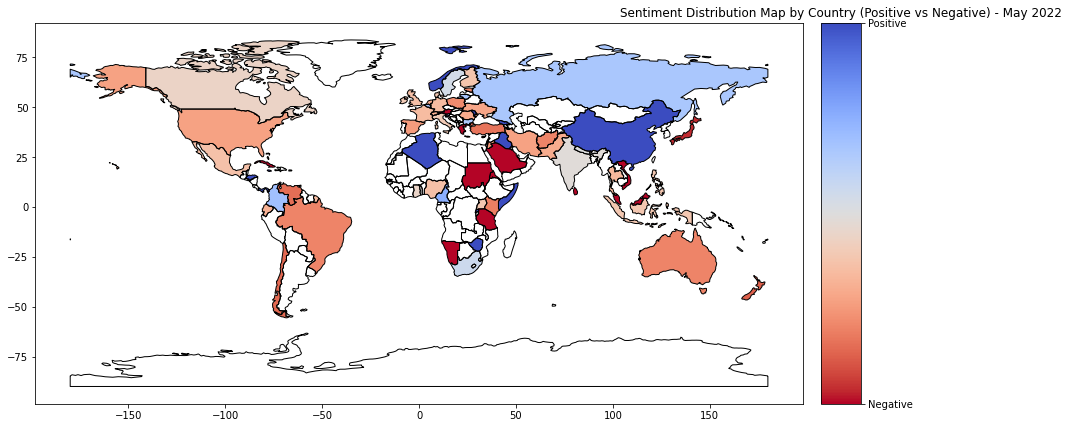

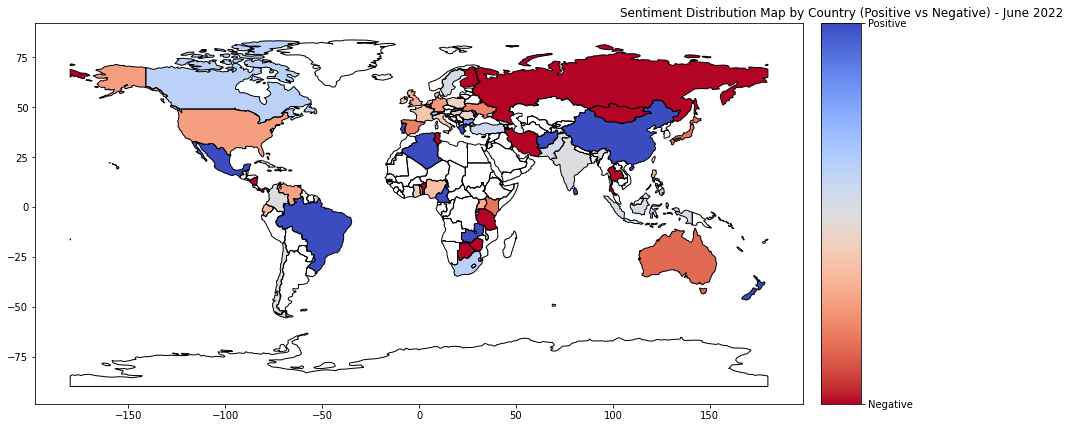

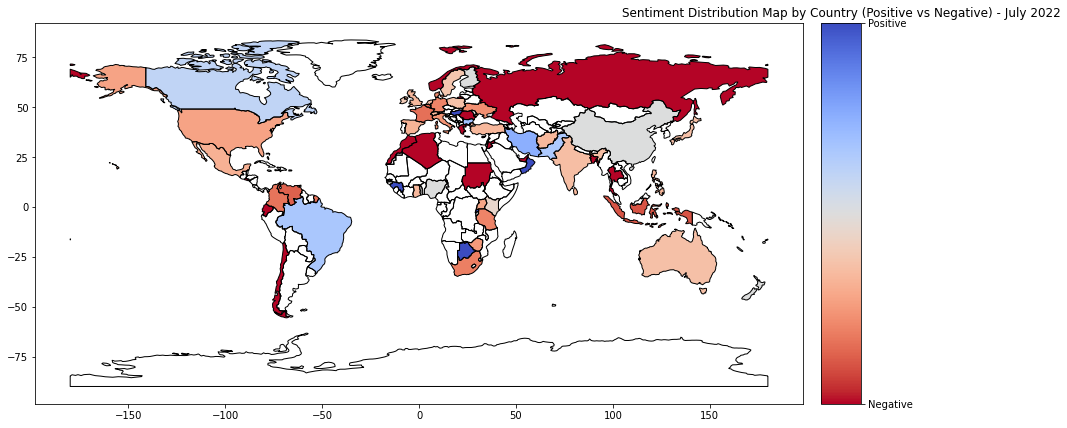

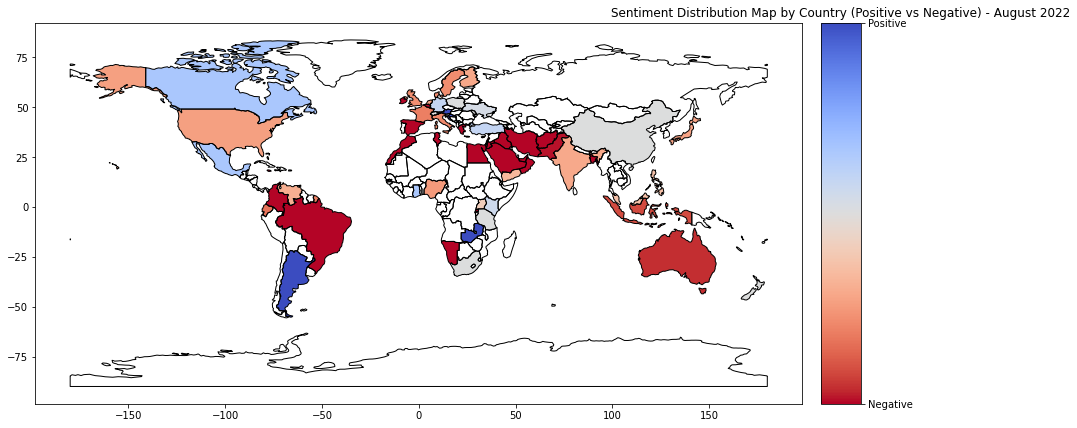

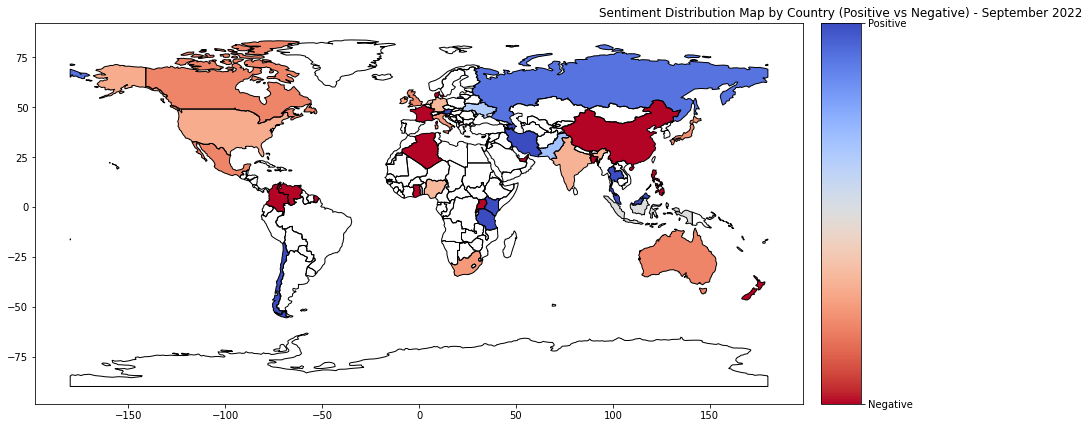

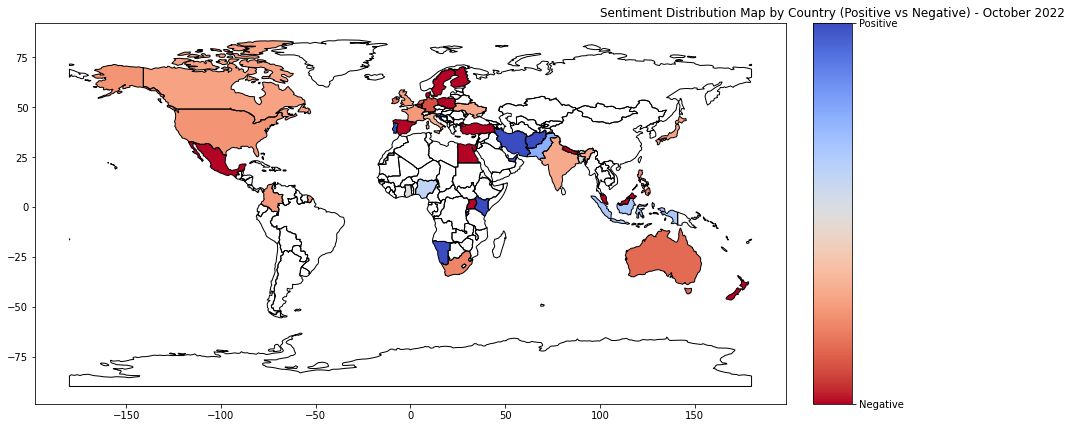

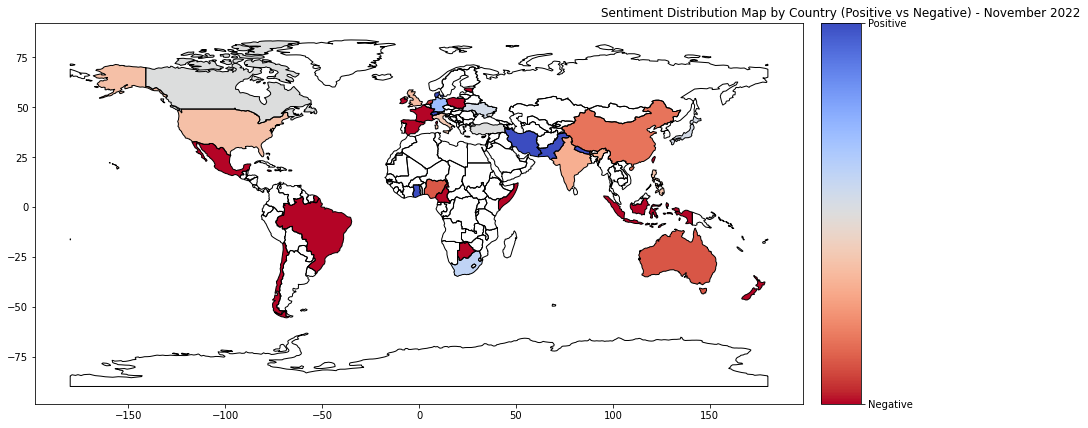

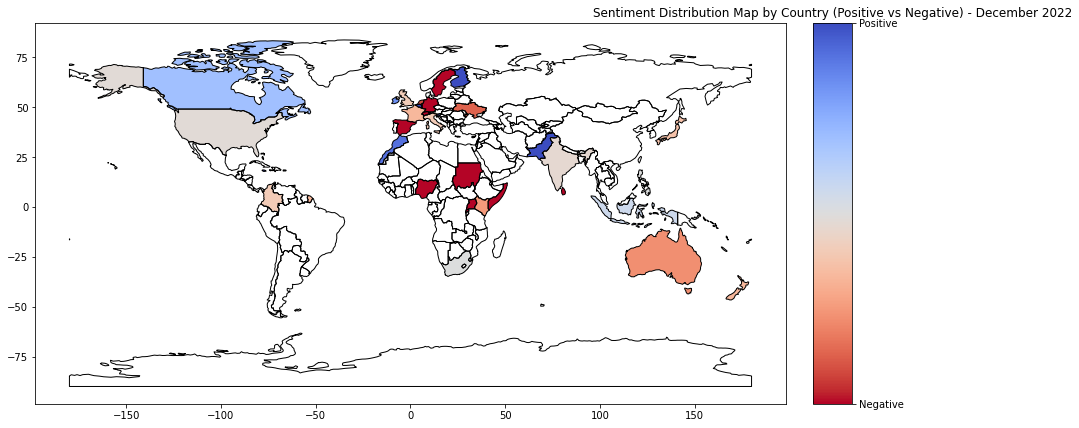

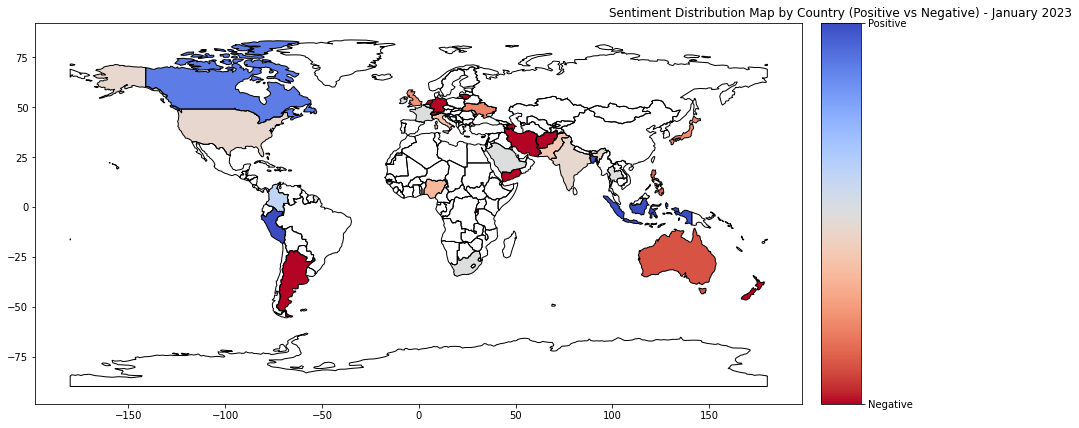

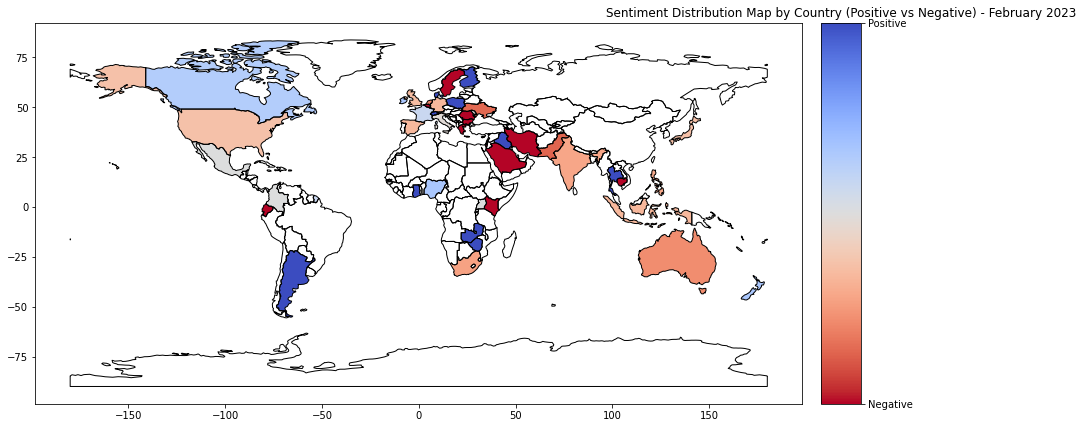

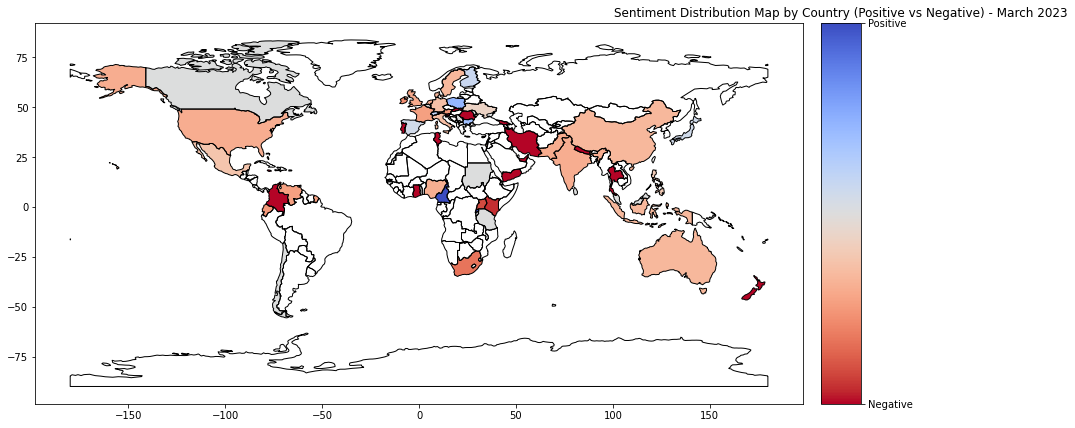

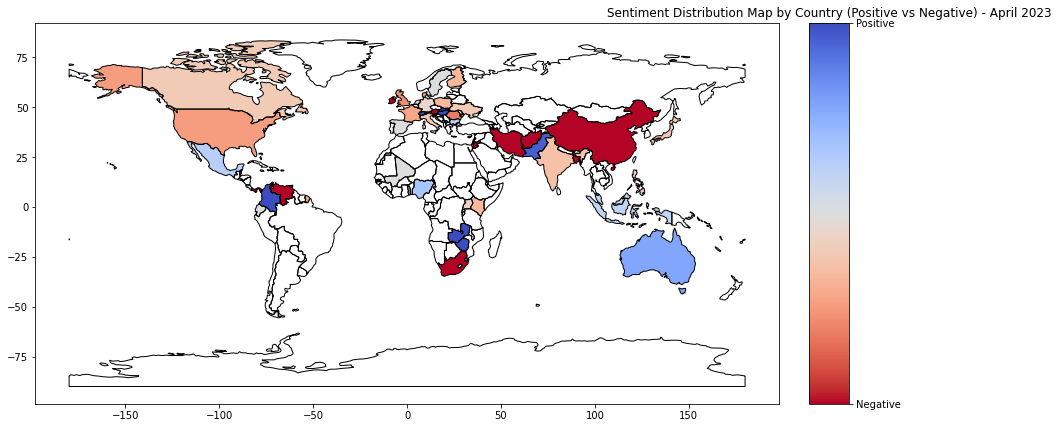

In [91]:
import os
import pandas as pd
import geopandas as gpd
import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


#BEGIN[ChatGPT][https://chat.openai.com/auth/login]

# I copy and pasted the ChatGPT to make a skeleton code and then I revised the code which did not work or weird

# command: By using the date,country, sentiment column, Plot the sentiment distribution on a monthly basis for countries as color 
#          Combine the sentiment values and the color of the countries in blue if the sentiment is predominantly positive and in red if the sentiment is predominantly negative.


# This code is designed to visualize the monthly distribution of sentiment (positive vs. negative) for a given set of tweets. 
# It processes tweet data grouped by country, calculates the sentiment sum for each country, and plots the results on a world map. 
# The sentiment sum is determined as the ratio of positive tweets to the total number of tweets (positive + negative). 
# The output is a series of world maps, each displaying the sentiment distribution for a specific month.

# Load the world GeoDataFrame

directory = 'merged_by_country_bert_processed_tweets'
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Prepare the date range
start_date = datetime.datetime(2022, 3, 1)
end_date = datetime.datetime(2023, 4, 30)
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

# Loop through each month in the date range
for date in date_range:
    # Filter the data for the current month
    month_start = date
    month_end = date + pd.DateOffset(months=1) - pd.DateOffset(days=1)
    
    tweet_by_country = {}
    sentiments_by_country = {}
    
    for root, dirs, files in os.walk(directory):
        for filename in files:
            count += 1
            printProgressBar(count, total, filename=os.path.join(root, filename))
            df = pd.read_csv(os.path.join(root, filename), encoding='UTF-8')
            
            for index, tweet in df.iterrows():
                tweet_date = pd.to_datetime(tweet['date'], errors='coerce')
                if month_start <= tweet_date <= month_end:
                    country = tweet[3]
                    sentiment = tweet[-2]
                    if country not in tweet_by_country:
                        tweet_by_country[country] = 1
                        sentiments_by_country[country] = {'POSITIVE': 0, 'NEGATIVE': 0}
                        sentiments_by_country[country][sentiment] += 1
                    else:
                        tweet_by_country[country] += 1
                        sentiments_by_country[country][sentiment] += 1
                        
    sentiment_map_dict = {'country': [], 'sentiment_sum': []}
    
    for country in sentiments_by_country.keys():
        if country == 'United States':
            sentiment_map_dict['country'].append('United States of America')
        else:
            sentiment_map_dict['country'].append(country)

        sentiment_map_dict['sentiment_sum'].append(int(sentiments_by_country[country]['POSITIVE']) / (int(sentiments_by_country[country]['NEGATIVE']) + int(sentiments_by_country[country]['POSITIVE'])))
    
    # Create a new DataFrame for the current month's sentiment data
    month_sentiments = pd.DataFrame(sentiment_map_dict)

    # Merge the sentiment data with the world GeoDataFrame using the 'country' column
    world_merged = world.merge(month_sentiments, left_on='name', right_on='country')

    # Plot the sentiment distribution on the world map
    fig, ax = plt.subplots(1, figsize=(15, 10))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    world.boundary.plot(ax=ax, linewidth=1, color='black')
    sm = plt.cm.ScalarMappable(cmap='coolwarm_r')
    sm.set_array(world_merged['sentiment_sum'])

    world_merged.plot(column='sentiment_sum', cmap='coolwarm_r', ax=ax)

    # Customize the colorbar
    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_ticks([cbar.vmin, cbar.vmax])
    cbar.set_ticklabels(['Negative', 'Positive'])

    plt.title(f"Sentiment Distribution Map by Country (Positive vs Negative) - {month_start.strftime('%B %Y')}")
    plt.show()

#END[ChatGPT]



C:\Users\Dukyoung\AppData\Local\Temp/ipykernel_7460/3747193420.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


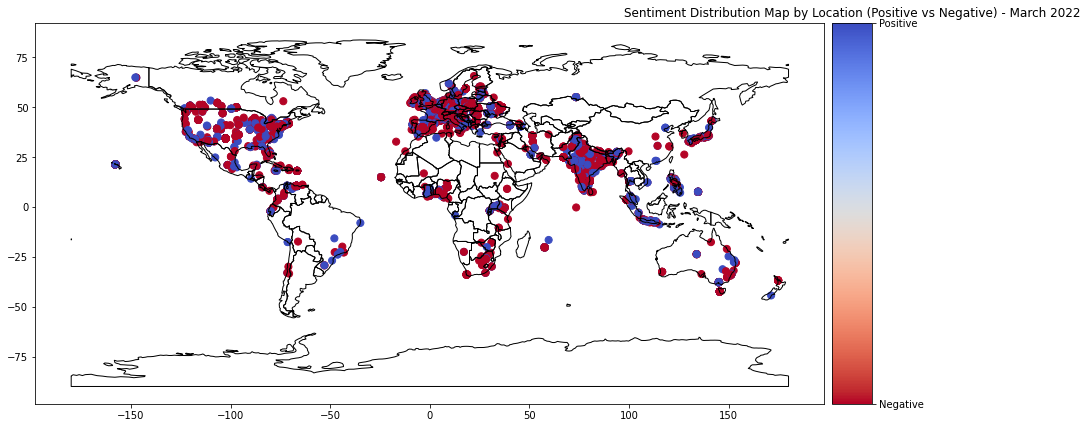

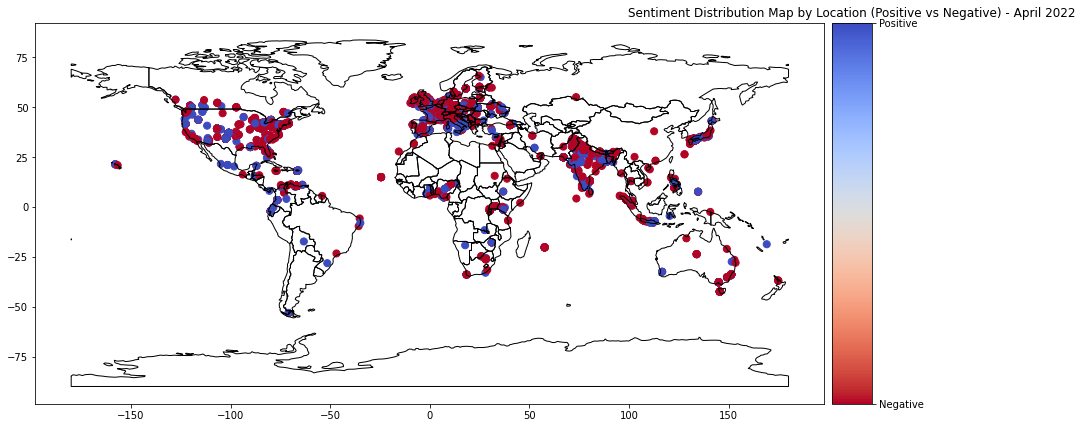

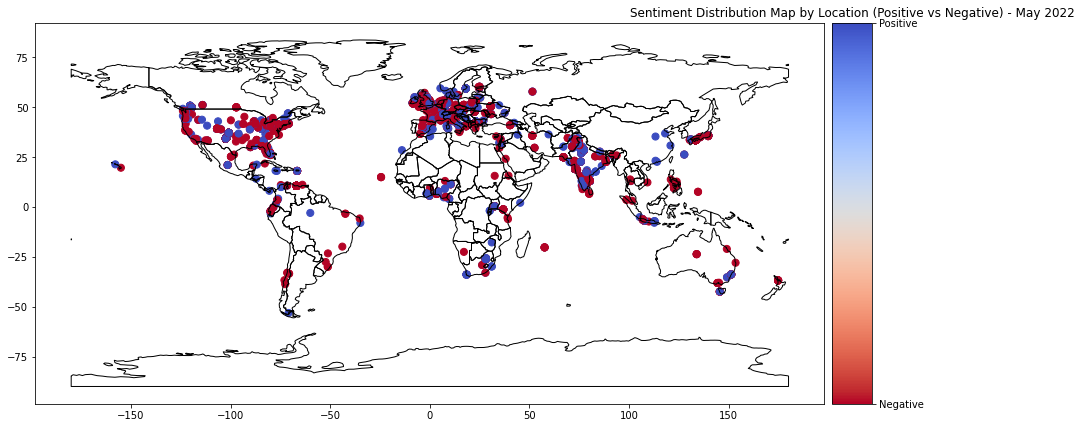

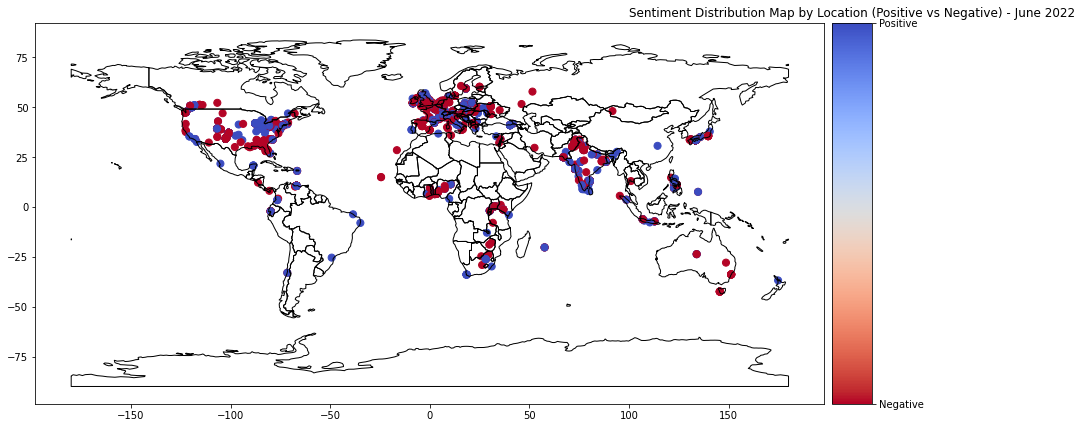

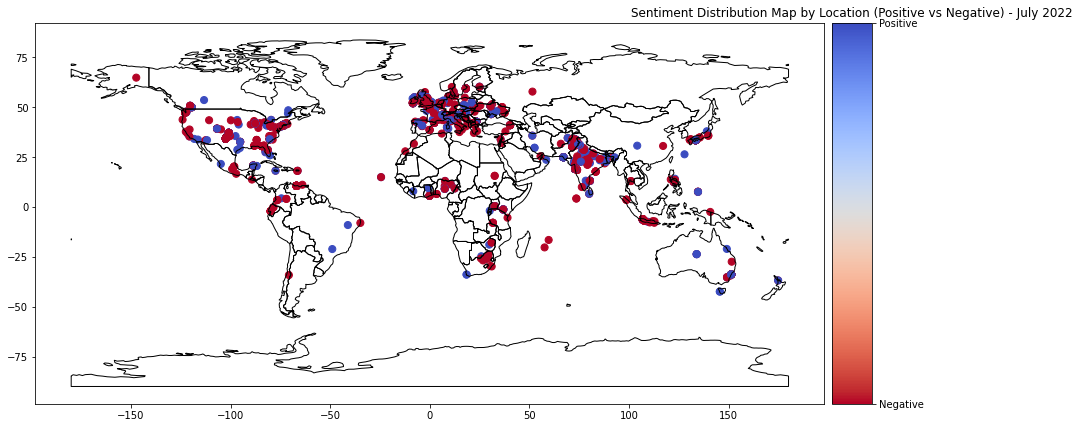

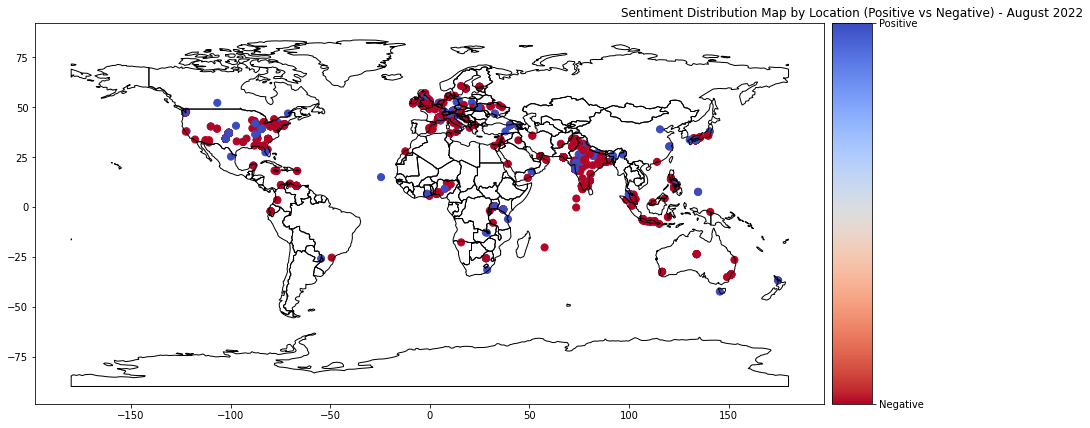

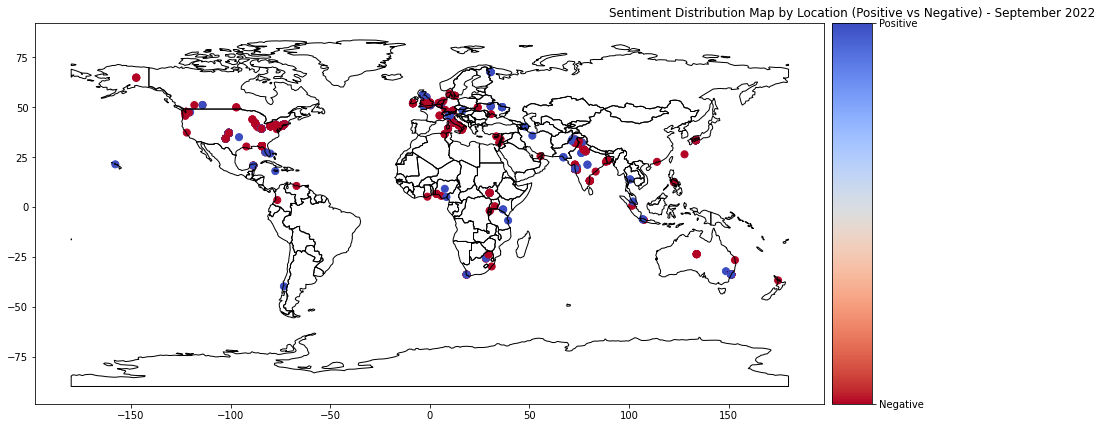

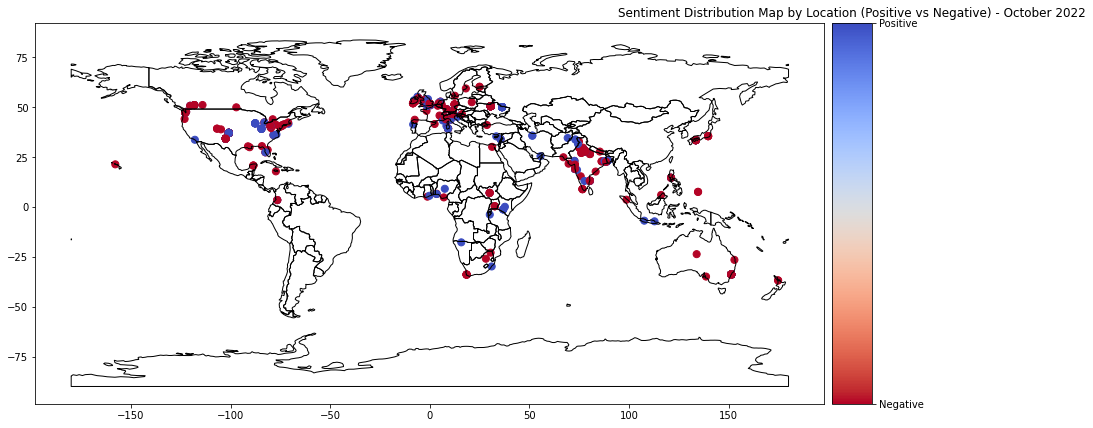

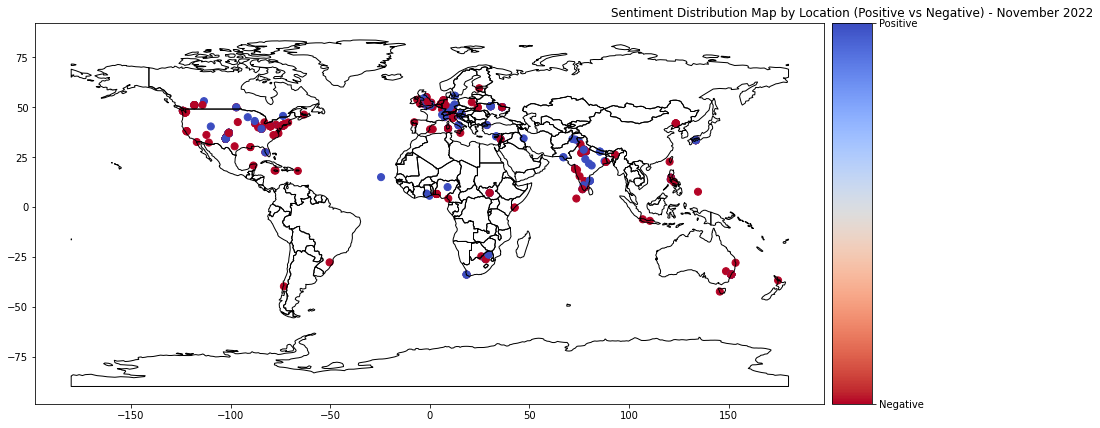

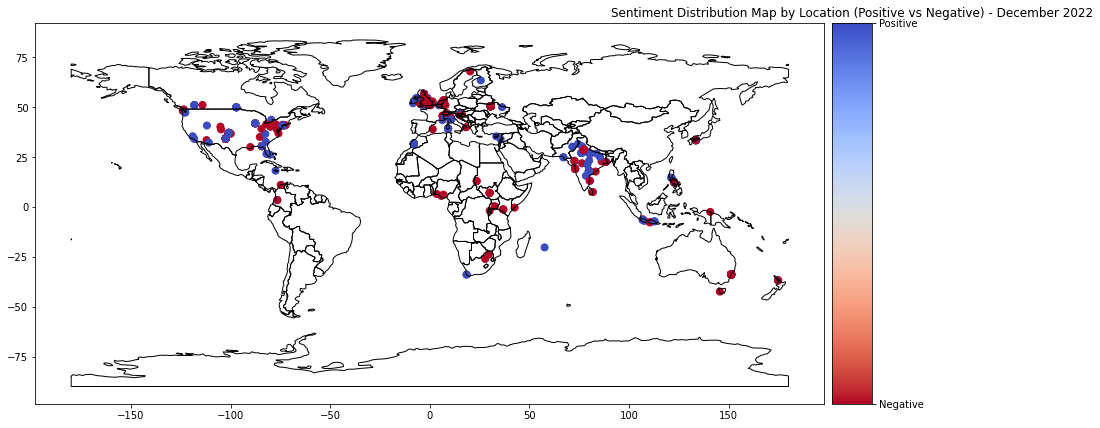

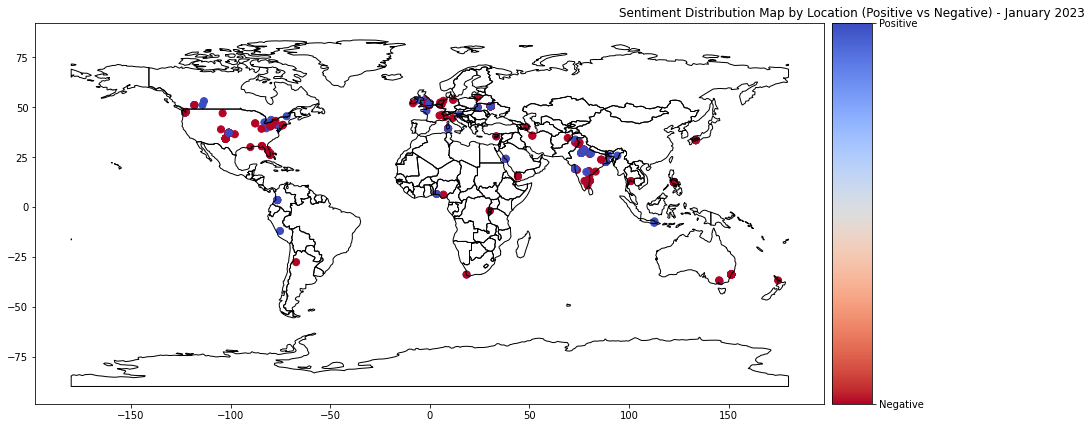

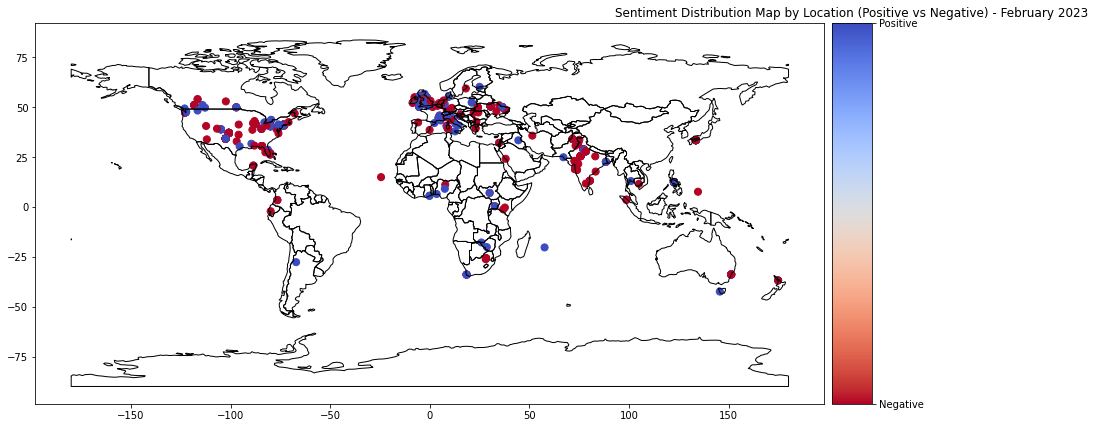

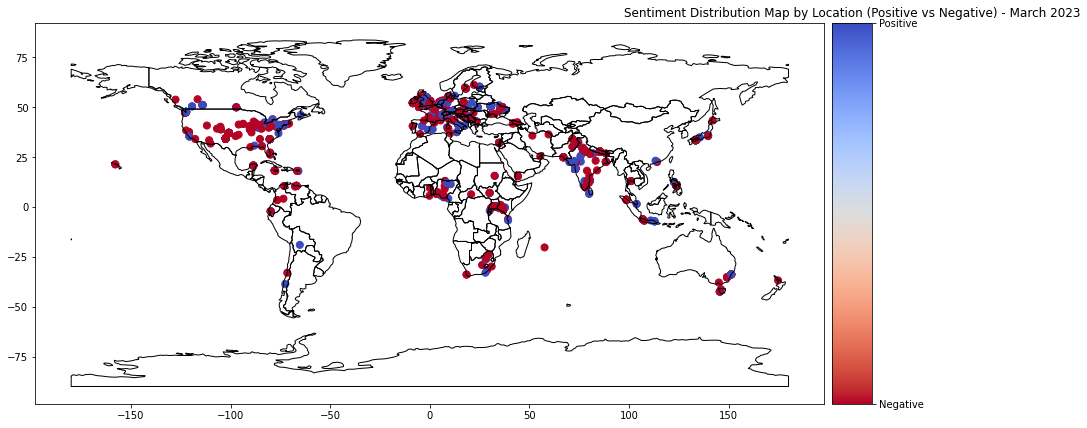

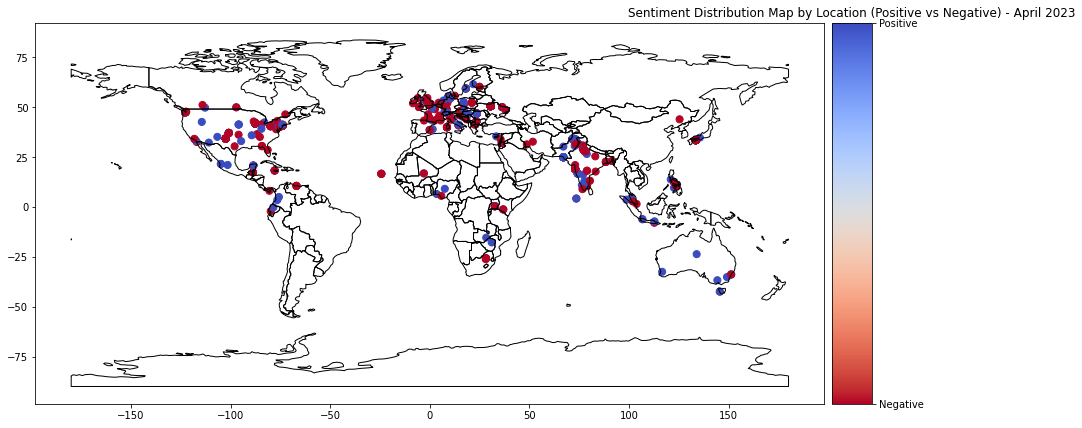

In [92]:

# This code is designed to visualize the monthly distribution of sentiment (positive vs. negative) for a given set of tweets. 
# This is same as upper one , but we use lon and lat column instead of county column for plot.


#BEGIN[ChatGPT][https://chat.openai.com/auth/login]

# I copy and pasted the ChatGPT to make a skeleton code and then I revised the code which did not work or weird

# command: Using the above result , make a ploy using lon and lat value instead of country column

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Prepare the date range
start_date = datetime.datetime(2022, 3, 1)
end_date = datetime.datetime(2023, 4, 30)
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

# Loop through each month in the date range
for date in date_range:
    directory = './merged_by_country_bert_processed_tweets/'
    month_start = date
    month_end = date + pd.DateOffset(months=1) - pd.DateOffset(days=1)
    lon_list = []
    lat_list = []
    sentiment_sum_list = []

    for root, dirs, files in os.walk(directory):
        for filename in files:
            df = pd.read_csv(os.path.join(root, filename), encoding='UTF-8')
            for index, tweet in df.iterrows():
                tweet_date = pd.to_datetime(tweet['date'], errors='coerce')
                if month_start <= tweet_date <= month_end:
                    lon = tweet['lon']
                    lat = tweet['lat']
                    sentiment = tweet['sentiment']

                    lon_list.append(lon)
                    lat_list.append(lat)

                    sentiment_sum = 1 if sentiment == 'POSITIVE' else 0
                    sentiment_sum_list.append(sentiment_sum)

    # Create a DataFrame with lon, lat, and sentiment_sum for the current month
    df = pd.DataFrame({'lon': lon_list, 'lat': lat_list, 'sentiment_sum': sentiment_sum_list})

    # Plot the sentiment distribution on the world map using lon and lat
    fig, ax = plt.subplots(1, figsize=(15, 10))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    world.boundary.plot(ax=ax, linewidth=1, color='black')
    sm = plt.cm.ScalarMappable(cmap='coolwarm_r')
    sm.set_array(df['sentiment_sum'])

    ax.scatter(df['lon'], df['lat'], c=df['sentiment_sum'], cmap='coolwarm_r', s=50)

    # Customize the colorbar
    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_ticks([cbar.vmin, cbar.vmax])
    cbar.set_ticklabels(['Negative', 'Positive'])

    plt.title(f"Sentiment Distribution Map by Location (Positive vs Negative) - {month_start.strftime('%B %Y')}")
    plt.show()

#END[ChatGPT]



In [93]:
directory = './merged_by_country_bert_processed_tweets'
for root, dirs, files in os.walk(directory):
    for filename in files:
        df = pd.read_csv(root+'/'+filename, encoding='UTF-8')
        tweet_counts.append(len(df.index))
        pos = 0
        neu = 0
        neg = 0
        for index, row in df.iterrows():
            # print(row['4'])
            if row['sentiment'] == 'POSITIVE':
                pos += 1
            elif row['sentiment'] == 'NEGATIVE':
                neg += 1
            else:
                neu += 1
                # printProgressBar(count, total, filename=os.path.join(root, filename))
            count+=1
        print(filename)
        print('Positives:',pos, 'Negatives:',neg, 'Errors:',neu)
print('total tweets:', count)

tweets_by_country_with_classification_2022_03.csv
Positives: 3238 Negatives: 6553 Errors: 0
tweets_by_country_with_classification_2022_04.csv
Positives: 1760 Negatives: 4566 Errors: 0
tweets_by_country_with_classification_2022_05.csv
Positives: 1564 Negatives: 4664 Errors: 0
tweets_by_country_with_classification_2022_06.csv
Positives: 1036 Negatives: 2034 Errors: 0
tweets_by_country_with_classification_2022_07.csv
Positives: 792 Negatives: 1816 Errors: 0
tweets_by_country_with_classification_2022_08.csv
Positives: 449 Negatives: 1726 Errors: 0
tweets_by_country_with_classification_2022_09.csv
Positives: 292 Negatives: 818 Errors: 0
tweets_by_country_with_classification_2022_10.csv
Positives: 335 Negatives: 846 Errors: 0
tweets_by_country_with_classification_2022_11.csv
Positives: 236 Negatives: 436 Errors: 0
tweets_by_country_with_classification_2022_12.csv
Positives: 334 Negatives: 553 Errors: 0
tweets_by_country_with_classification_2023_01.csv
Positives: 191 Negatives: 374 Errors: 0


In [94]:
subdirectory = 'merged_by_country_bert_processed_tweets'

# Read whole data set and merged it as a df 
merged_df = pd.DataFrame()

for filename in os.listdir(subdirectory):
    
    if filename.endswith('.csv'):
        file_path = os.path.join(subdirectory, filename)

        # Read the CSV file with UTF-8 encoding
        df = pd.read_csv(file_path, encoding='UTF-8', low_memory=False)

        merged_df = pd.concat([merged_df, df], ignore_index=True)

# display(merged_df)


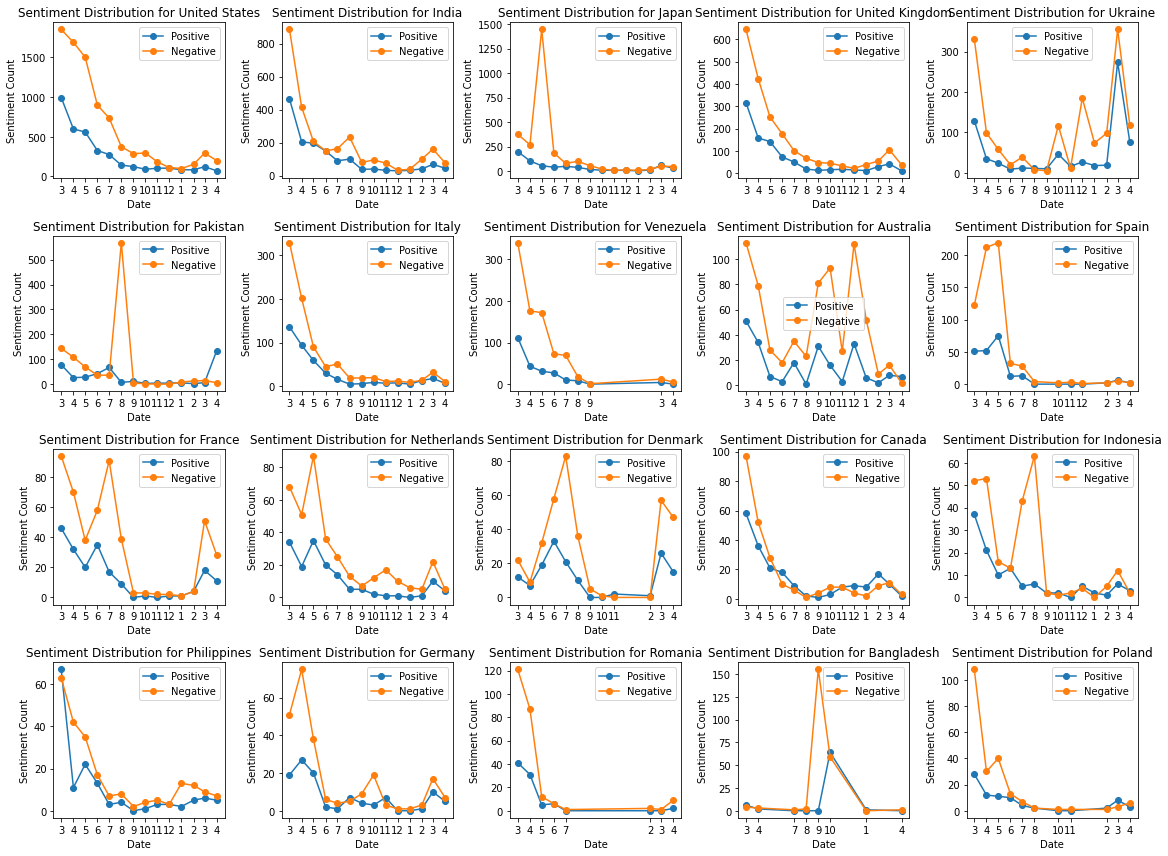

In [95]:
#BEGIN[ChatGPT][https://chat.openai.com/auth/login]

# I copy and pasted the ChatGPT to make a skeleton code and then I revised the code which did not work or weird

# command: By using the date,country, sentiment column, please create a code that plots a grid of graphs for the top 20 countries with the highest number of Twitter users, 
# with the x-axis representing months and the y-axis representing the sum of sentiment scores. Display the x, y coordinates for both positive and negative sentiments, 
# and draw a linear function for each country.

def plot_sentiment_distribution(merged_df):
    # Convert date data format
    merged_df['date'] = pd.to_datetime(merged_df['date'].str[:10], format="%Y-%m-%d", errors='coerce')

    # Filter the dataframe based on the date range
    start_date = datetime.datetime(2022, 3, 1)
    end_date = datetime.datetime(2023, 4, 30)
    filtered_df = merged_df[(merged_df['date'] >= start_date) & (merged_df['date'] <= end_date)]

    # Remove rows with NaT values
    filtered_df = filtered_df.dropna(subset=['date'])

    # Group by country, month, and sentiment, and calculate the sum of sentiments
    grouped = filtered_df.groupby(['country', filtered_df['date'].dt.to_period('M'), 'sentiment']).size().unstack().fillna(0)

    # Rename columns
    grouped.columns = ['Negative', 'Positive']

    # Select the top 20 countries
    top_20_countries = grouped.groupby('country').sum().sum(axis=1).nlargest(20).index

    # Plot in a grid format
    num_rows = 4
    num_cols = 5

    # Adjust the country list into a grid format
    if len(top_20_countries) > num_rows * num_cols:
        top_20_countries = top_20_countries[:num_rows * num_cols]
    else:
        top_20_countries = np.pad(top_20_countries, (0, num_rows * num_cols - len(top_20_countries)), mode='constant', constant_values='')

    # Plot in a grid format
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 12))

    for i, country in enumerate(top_20_countries):
        country_data = grouped.loc[country]

        # Calculate total sentiment counts for each month
        monthly_counts = country_data.groupby(country_data.index).sum()

        row = i // num_cols
        col = i % num_cols
        ax = axs[row, col]

        x = monthly_counts.index.to_timestamp()
        y_positive = monthly_counts['Positive'].values
        y_negative = monthly_counts['Negative'].values

        ax.plot(x, y_positive, marker='o', linestyle='-', label='Positive')
        ax.plot(x, y_negative, marker='o', linestyle='-', label='Negative')

        ax.set_xlabel('Date')
        ax.set_ylabel('Sentiment Count')
        ax.set_title(f'Sentiment Distribution for {country}')
        ax.legend()

        # Modify x-axis tick labels
        x_labels = [label.month if label.month <= 12 else label.month - 12 for label in x]
        ax.set_xticks(x)
        ax.set_xticklabels(x_labels)

    plt.tight_layout()
    plt.show()

#END[ChatGPT]


plot_sentiment_distribution(merged_df.copy())


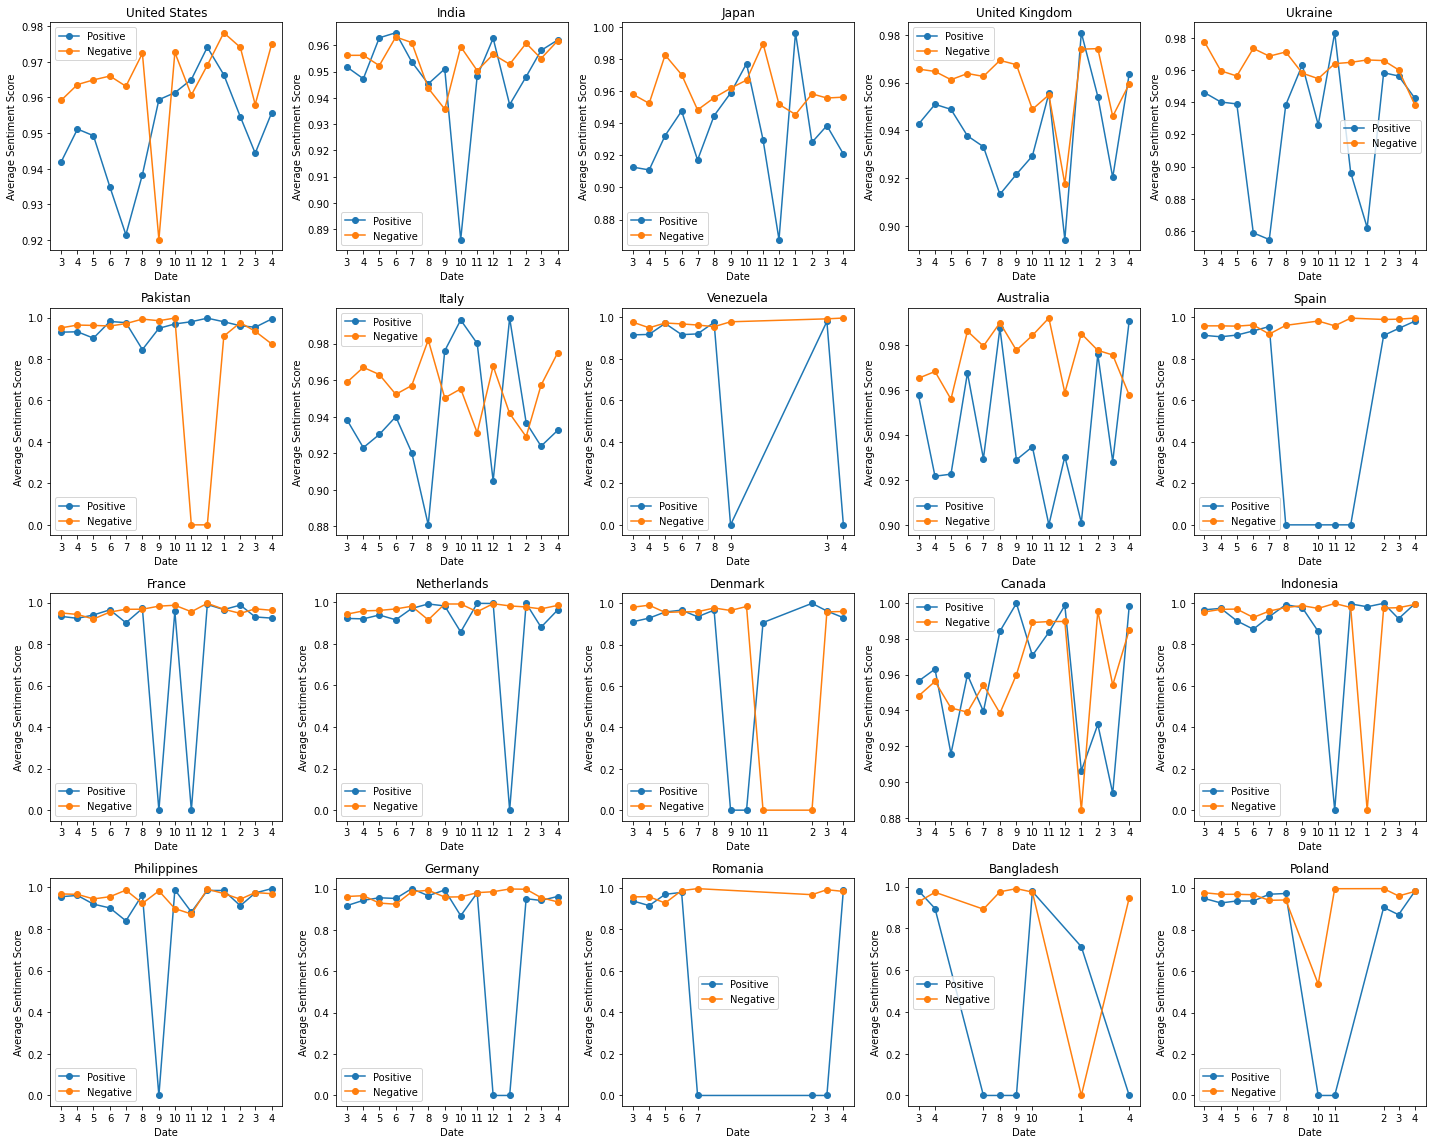

In [96]:
def plot_average_sentiment_top_countries(merged_df):
    # Convert date data format
    merged_df['date'] = pd.to_datetime(merged_df['date'].str[:10], format="%Y-%m-%d", errors='coerce')

    # Filter the dataframe based on the date range
    start_date = datetime.datetime(2022, 3, 1)
    end_date = datetime.datetime(2023, 4, 30)
    filtered_df = merged_df[(merged_df['date'] >= start_date) & (merged_df['date'] <= end_date)]

    # Remove rows with NaT values
    filtered_df = filtered_df.dropna(subset=['date'])

    # Find top 20 countries by sentiment count
    top_countries = filtered_df['country'].value_counts().nlargest(20).index

    # Group by country, month, and sentiment, and calculate the average of sentiment scores
    grouped = filtered_df.groupby(['country', filtered_df['date'].dt.to_period('M'), 'sentiment']).agg({'sentiment_score': 'mean'}).unstack().fillna(0)

    # Rename columns
    grouped.columns = ['Negative', 'Positive']

    # Plot in a grid format
    num_rows = 4
    num_cols = 5
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 16))

    for i, country in enumerate(top_countries):
        country_data = grouped.loc[country]
        
        row = i // num_cols
        col = i % num_cols
        ax = axs[row, col]

        x = country_data.index.to_timestamp()
        y_positive = country_data['Positive'].values
        y_negative = country_data['Negative'].values

        ax.plot(x, y_positive, marker='o', linestyle='-', label='Positive')
        ax.plot(x, y_negative, marker='o', linestyle='-', label='Negative')

        ax.set_xlabel('Date')
        ax.set_ylabel('Average Sentiment Score')
        ax.set_title(f'{country}')
        ax.legend()

        # Modify x-axis tick labels
        x_labels = [label.month if label.month <= 12 else label.month - 12 for label in x]
        ax.set_xticks(x)
        ax.set_xticklabels(x_labels)

    plt.tight_layout()
    plt.show()

plot_average_sentiment_top_countries(merged_df.copy())
